<a href="https://colab.research.google.com/github/Rosalie324/Housing-price-Analysis/blob/main/Copie_de_Yes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder


In [128]:
housing = pd.read_csv('housing.csv')

In [129]:
housing.shape

(20640, 10)

2040**row**
 10**columns**

In [130]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [131]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [132]:
housing["ocean_proximity"].value_counts()
#this will give you the distibution of categories in this variable

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [133]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

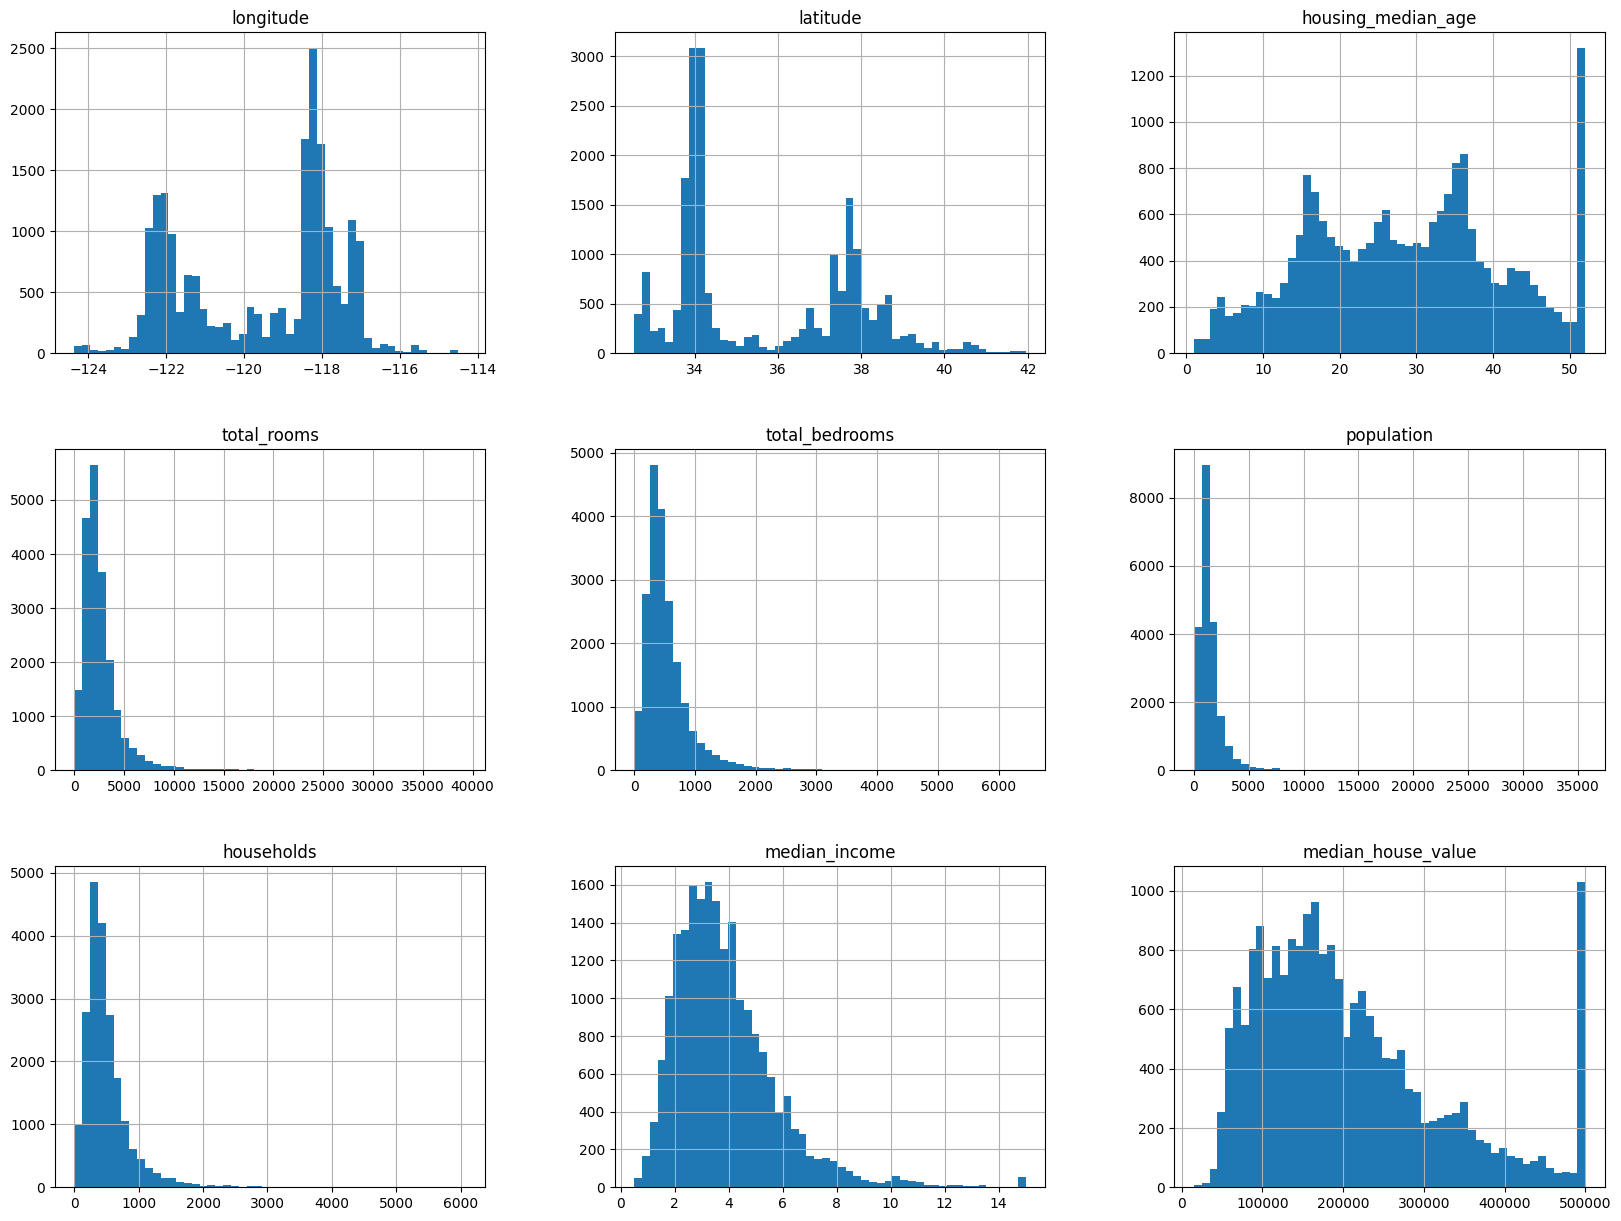

In [134]:
housing.hist(bins=50,figsize=(20,15))

As you can see this are the numerical representation in Histograms. The axis (both y and x ) are divided into 50 bins

<Axes: xlabel='longitude', ylabel='latitude'>

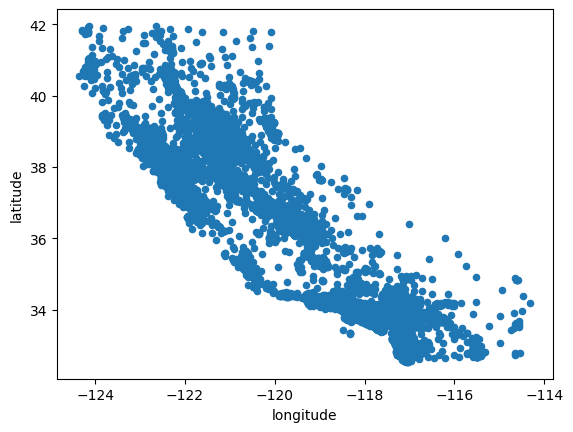

In [135]:
housing.plot(kind="scatter", x="longitude", y="latitude")

to this line of code lets add "alpha=0.1"

<Axes: xlabel='longitude', ylabel='latitude'>

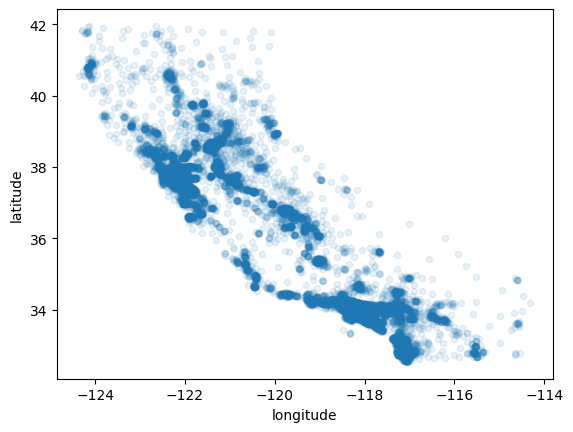

In [136]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Each blue mark represent houses found in different districts in california

<Axes: xlabel='longitude', ylabel='latitude'>

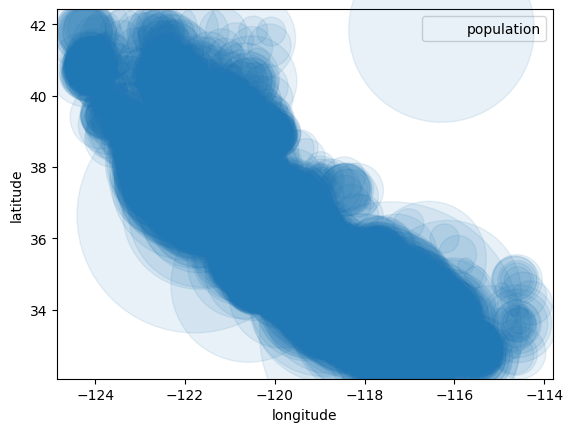

In [137]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1 , s=housing["population"], label="population")

Let divid population by 100 for more visibility


<Axes: xlabel='longitude', ylabel='latitude'>

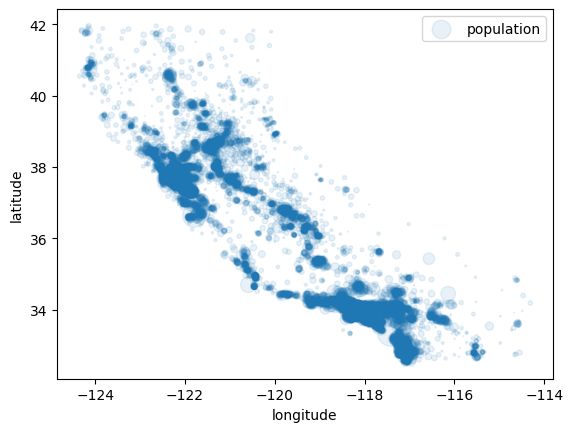

In [138]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1 , s=housing["population"]/100, label="population")

<Axes: xlabel='longitude', ylabel='latitude'>

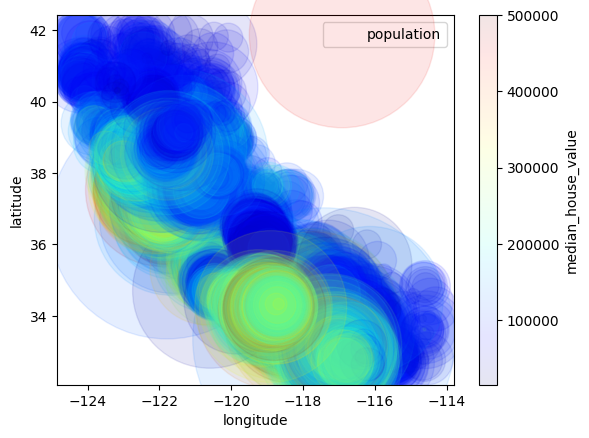

In [139]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1 , s=housing["population"], label="population", c="median_house_value", cmap=plt.get_cmap("jet"))

Yes don't forget to divid by 100

<Axes: xlabel='longitude', ylabel='latitude'>

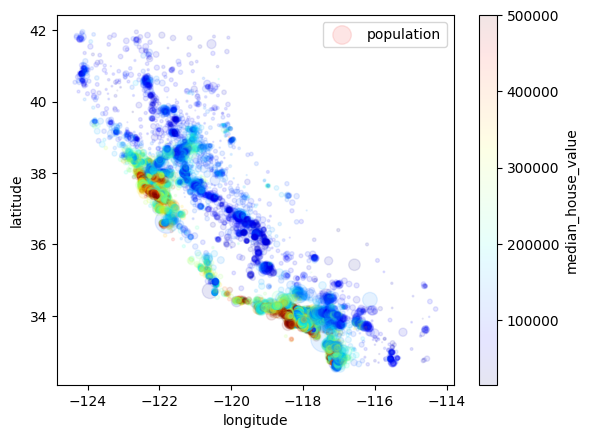

In [140]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.1, s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"))

The dark blue colors rep the cheapest houses, the lighter it goes to the red it is increasly expensive

In [146]:
# Create the DataFrame
df = housing

# Step 1: Encode the 'ocean_proximity' column
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

housing = df

# Corrillation shows how closely related values are

In [148]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.289779,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,0.200974,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.112468,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,-0.015693,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,-0.014768,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.070282,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,-0.018186,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,-0.014957,0.688075
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,1.000000,0.081750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,0.081750,1.000000


Now i want to call out a spacific column from this table(corr_matrix). And sort it by having the highest price on top and the lowest at the bottom.

In [149]:
# Step 2: Compute the correlation matrix
corr_matrix = housing.corr()

# Step 3: Sort the correlations for 'median_house_value' in descending order
corr_values = corr_matrix['median_house_value'].sort_values(ascending=False)

# Print the sorted correlation values
print(corr_values)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [142]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


# Drop every value in which the total number of bedrooms is missing put it in a new table (housing_na)

In [88]:
housing_na=housing.dropna(subset=["total_bedrooms"])
#here I am dropping th eobservations with missing values for total_bedrooms
housing_na.shape

(20433, 10)

The code above shows the new dataset created (housing_na) with fewer observations and all values are clean from "Total number of missing bedroom"

In [89]:
#here is how to turn category variables into bianary vairiables
dummies=pd.get_dummies(housing_na.ocean_proximity)
dummies.head()
housing_na_dummies = pd.concat([housing_na, dummies], axis='columns')
housing_na_dummies.head()
housing_clean = housing_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis='columns')
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,True,False


In [110]:
df=housing_clean

In [111]:

df = pd.DataFrame(housing_clean)

# Convert the boolean columns to integers
df["<1H OCEAN"] = df["<1H OCEAN"].astype(int)
df["INLAND"] = df["INLAND"].astype(int)
df["NEAR BAY"] = df["NEAR BAY"].astype(int)
df["NEAR OCEAN"] = df["NEAR OCEAN"].astype(int)

housing_clean=df

housing_clean.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [112]:
X=housing_clean.drop(['median_house_value'], axis='columns')
X.head()
y=housing_clean['median_house_value']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=1984)

In [115]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train, y_train)


LinearRegression()

In [116]:
#display the intercept and coefficient
print(" the intercept is " +  str(OLS.intercept_))
print(" the coeffiients are " +  str(OLS.coef_))
print(" the R_sqaured value is " +  str(OLS.score(X_train, y_train)))

 the intercept is -2146719.495872031
 the coeffiients are [-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.49036788e+05 -1.87787533e+05 -1.51883617e+05 -1.45673607e+05]
 the R_sqaured value is 0.6433902949192565


In [117]:
#predicting with OLS
y_pred=OLS.predict(X_test)
performance = pd.DataFrame({'PREDICTIONS': y_pred, 'ACTUAL VALUES':y_test})
performance.head()
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
15175,315646.738470,328200,12553.261530
15424,235926.156196,156900,-79026.156196
16212,157003.325611,87200,-69803.325611
15356,172404.340246,141000,-31404.340246
1899,82931.270634,100800,17868.729366


In [118]:
#preparing data for plotting
performance.reset_index(drop=True, inplace=True) #inplace turns into a column
performance.reset_index(inplace=True)
performance.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,315646.738470,328200,12553.261530
1,1,235926.156196,156900,-79026.156196
2,2,157003.325611,87200,-69803.325611
3,3,172404.340246,141000,-31404.340246
4,4,82931.270634,100800,17868.729366


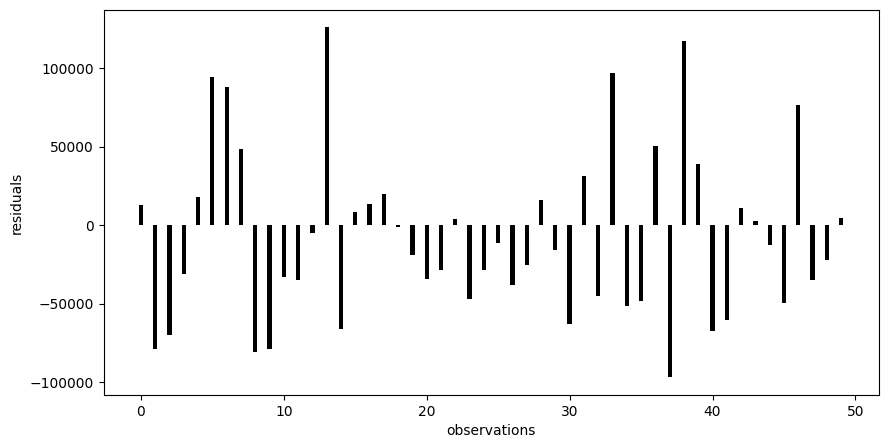

In [119]:
#plot the residuals
fig = plt.figure(figsize=(10,5))
plt.bar('index', 'error', data=performance[:50], color='black', width=0.3)
plt.ylabel('residuals')
plt.xlabel('observations')
plt.show()

In [120]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_train.head()

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
6885,1.0,-118.09,34.06,31,1146,289.0,1163,258,2.2083,1,0,0,0
4220,1.0,-118.28,34.12,50,2384,312.0,836,337,12.8763,1,0,0,0
9915,1.0,-122.31,38.33,21,1922,344.0,1051,342,3.6042,0,0,1,0
294,1.0,-122.17,37.77,39,1612,342.0,912,322,3.3958,0,0,1,0
6574,1.0,-118.16,34.20,43,1810,343.0,988,307,3.8203,1,0,0,0


In [121]:
nicer_OLS=sm.OLS(y_train,X_train).fit()
nicer_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2456.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:25:44   Log-Likelihood:            -2.0522e+05
No. Observations:               16346   AIC:                         4.105e+05
Df Residuals:                   16333   BIC:                         4.106e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.147e+06   1.05e+05    -20.413      0.000   -2.35e+06   -1.94e+06
longitude          -2.722e+04   1141.708    -23.841      0.000   -2.95e+04    -2.5e+04
latitude           -2.612e+04   1125.571    -23.208      0.000   -2.83e+04   -2.39e+04
housing_median_age  1036.3175     49.179     21.072      0.000     939.922    1132.713
total_rooms           -6.3977      0.891     -7.184      0.000      -8.143      -4.652
total_bedrooms        99.7707      7.613     13.105      0.000      84.848     114.694
population           -37.3546      1.189    -31.405      0.000     -39.686     -35.023
households            49.9035      8.223      6.069      0.000      33.786      66.021
median_income       3.937e+04    382.254    102.983      0.000    3.86e+04    4.01e+04
<1H OCEAN           -1.49e+05   3.43e+04     -4.339      0.000   -2.16e+05   -8.17e+04
INLAND             -1.878e+05   3.44e+04     -5.456      0.000   -2.55e+05    -1.2e+05
NEAR BAY           -1.519e+05   3.44e+04     -4.416      0.000   -2.19e+05   -8.45e+04
NEAR OCEAN         -1.457e+05   3.44e+04     -4.239      0.000   -2.13e+05   -7.83e+04
==============================================================================
Omnibus:                     4103.497   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16258.145
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       7.255   Cond. No.                     8.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""